In [1]:
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from tabulate import tabulate

## Obesity Dataset

In [3]:
df = pd.read_csv('./datasets/ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


FAVC - Frequent consumption of high caloric food

FCVC - Frequency of consumption of vegetables

NCP - Number of main meals

CAEC - Consumption. of food between meals

CH20 - Consumption of water daily

CALC - Consumption of alcohol

SCC - Calories consumption monitoring

FAF - Physical activity frequency

TUE - Time using technology devices

MTRANS - Transportation used

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


There aren't any missing values in this dataset according to the dataset description.

In [6]:
res = {}
for col in df.columns:
    try:
        temp = [float(x) for x in df[col]]
        res[col] = 'Numerical'
    except:
        res[col] = 'Categorical'

In [7]:
print(tabulate([res], headers='keys'))

Gender       Age        Height     Weight     family_history_with_overweight    FAVC         FCVC       NCP        CAEC         SMOKE        CH2O       SCC          FAF        TUE        CALC         MTRANS       NObeyesdad
-----------  ---------  ---------  ---------  --------------------------------  -----------  ---------  ---------  -----------  -----------  ---------  -----------  ---------  ---------  -----------  -----------  ------------
Categorical  Numerical  Numerical  Numerical  Categorical                       Categorical  Numerical  Numerical  Categorical  Categorical  Numerical  Categorical  Numerical  Numerical  Categorical  Categorical  Categorical


## Dealing with Categorical data

Our target variable is NObeyesdad so I will label them 1-7

As for the rest I will one-hot encode them.

## Single Variable Exploratory Data Analysis

Define some helper functions for EDA

In [8]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1, 1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order=df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(100*height/total),
               ha="center")
    plt.show()

## Nobeyesdad

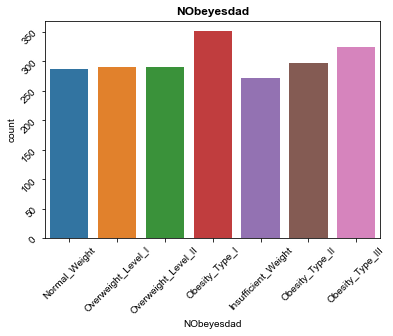

In [9]:
sns.countplot(x="NObeyesdad",data=df)
plt.title('NObeyesdad', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)

According to https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

This data is all synthetic and doesn't go into detail regarding what the difference between 
overweight_II and overweight_II for example. So I will define these as best I can.

Using some definitions from the CDC: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

insufficient_weight = bmi < 18.5

Normal_Weight = bmi > 18.5 and bmi < 24.9

Now, the difference between overweight and obesity is about 5 points for bmi... Let's say that overweight_I is a bmi between 25 and 27.5 and that overweight_II is a bmi between 27.6 and 29.9

I'll say that obesity_1 is a bmi between 30 and 40, obesity_II is a bmi between 40 and 50, and finally obesity_III is a bmi greater than 50.

Something to note about the target variable is that the data is well balance with a slight inclination toward obesity_I

## Weight
Note that these values are in kilograms not pounds

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



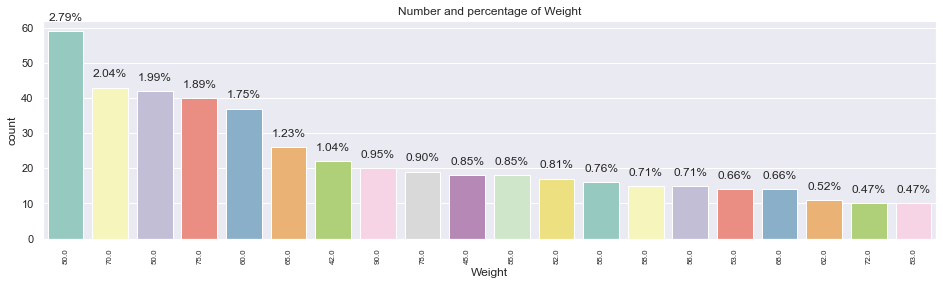

In [10]:
plot_count("Weight", "Weight", df, 4)

In [11]:
df.Weight.describe()

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

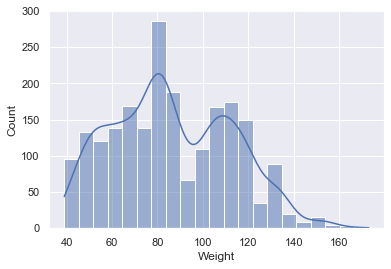

In [12]:
ax = sns.histplot(df['Weight'], kde=True)

With a mean of 86.58 a min of 39, and a max of 173. We can see that 50% of the data is below 83.

From our plots I can see that the data is normalish in terms of distribution. There is a large amount of data is concentrated around 80 kilos. Not surpising since that is where our mean is. This is around 176lbs so I can see why obesity_I is the most common classification since I know that at 6 foot male who is considered obesity_I at around 180lbs.

## Age

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



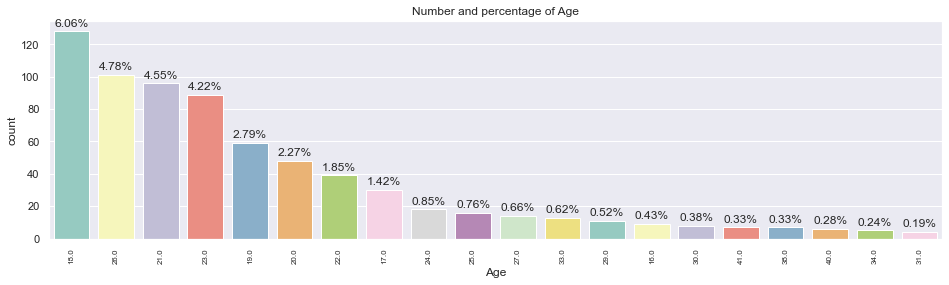

In [13]:
plot_count("Age", "Age", df, 4)

In [14]:
df.Age.describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

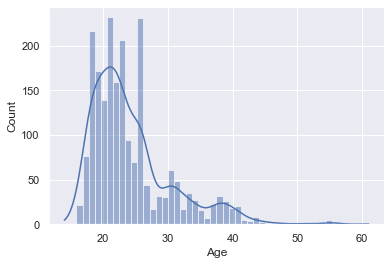

In [15]:
ax = sns.histplot(df['Age'], kde=True)

I don't see why age would be impactful in terms of obesity. I think that age may be indicitive regarding other reasons in life that may prevent one from doing proper exercise and proper diet. I suppose those are the uncertainties we're attempting to learn about here. Regardless,
The age ranges are between 14-61, most of the data is concentrate to before 30.

## Height

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



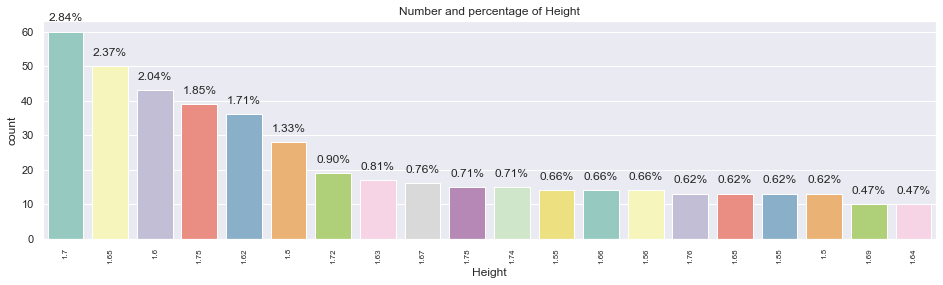

In [16]:
plot_count("Height", "Height", df, 4)

In [17]:
df.Height.describe()

count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64

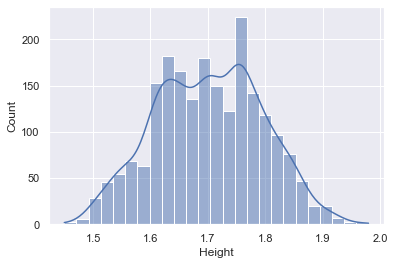

In [18]:
ax = sns.histplot(df['Height'], kde=True)

Height is in meters for this variable. We can see that the range for height is from exceptionally vertically impaired to about 6"5'. Our mean is 1.7 meters or 5"5' so, again considering the average weight is 176lbs an average height of 5"5' an obesity_I average is not surprising.

## FCVC

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



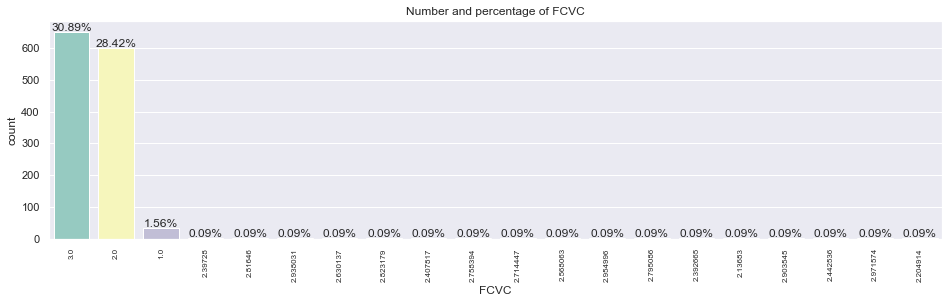

In [19]:
plot_count("FCVC", "FCVC", df, 4)

In [20]:
df.FCVC.describe()

count    2111.000000
mean        2.419043
std         0.533927
min         1.000000
25%         2.000000
50%         2.385502
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64

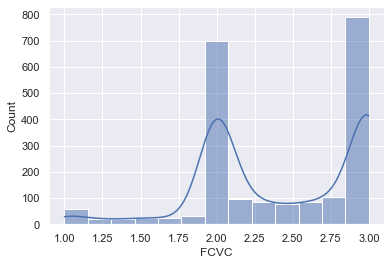

In [21]:
ax = sns.histplot(df['FCVC'], kde=True)

Note that:
1 = Never
2 = Sometimes
3 = Always

This distribution is basically expected with those values. I think that very few individuals would NEVER consume vegetables.

## Where am I getting these clarifications for this data from?
https://www.sciencedirect.com/science/article/pii/S2352340919306985

## NCP

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



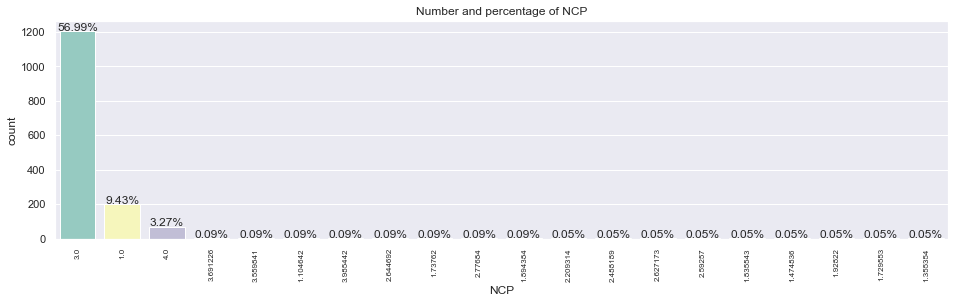

In [22]:
plot_count("NCP", "NCP", df, 4)

In [23]:
df.NCP.describe()

count    2111.000000
mean        2.685628
std         0.778039
min         1.000000
25%         2.658738
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64

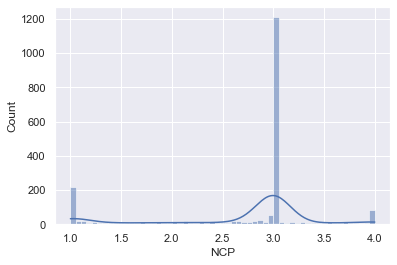

In [24]:
ax = sns.histplot(df['NCP'], kde=True)

Note that:
1 = 1 or 2 meals
3 = 3 meals
4 = > 3 meals

These numbers are beleivable.

## CH2O

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



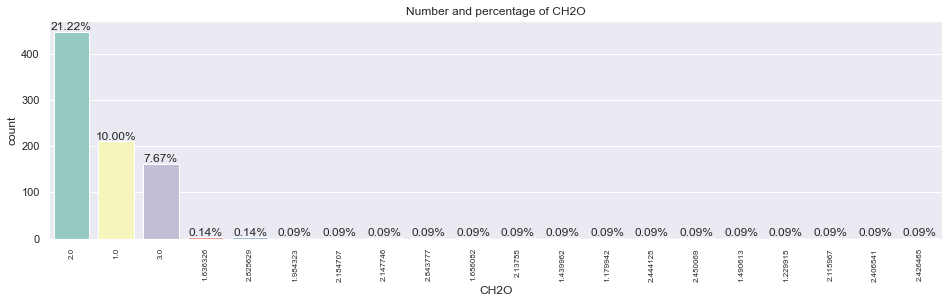

In [25]:
plot_count("CH2O", "CH2O", df, 4)

In [26]:
df.CH2O.describe()

count    2111.000000
mean        2.008011
std         0.612953
min         1.000000
25%         1.584812
50%         2.000000
75%         2.477420
max         3.000000
Name: CH2O, dtype: float64

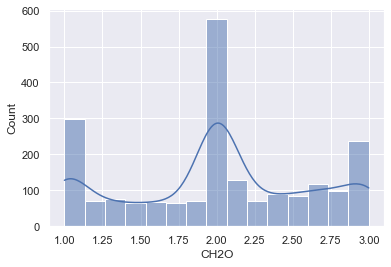

In [27]:
ax = sns.histplot(df['CH2O'], kde=True)

3 liters ~ 12.6 cups.
2 liters ~ 8.4 cups ~ Average recommended amount of water recommended daily.

We can see that most participants are hydrated.

## FAF

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



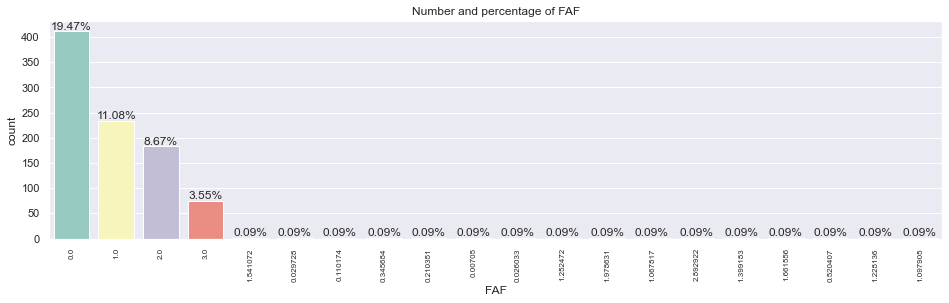

In [28]:
plot_count("FAF", "FAF", df, 4)

In [29]:
df.FAF.describe()

count    2111.000000
mean        1.010298
std         0.850592
min         0.000000
25%         0.124505
50%         1.000000
75%         1.666678
max         3.000000
Name: FAF, dtype: float64

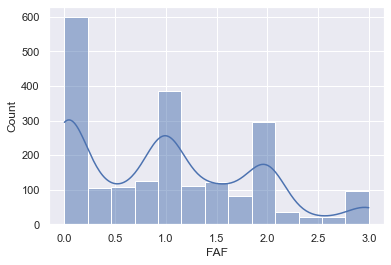

In [30]:
ax = sns.histplot(df['FAF'], kde=True)

We can see that most participants do exercise. There is a large number that don't. Based on the weight and common label. This result isn't all too surprising.

## TUE

In [31]:
df.TUE.describe()

count    2111.000000
mean        0.657866
std         0.608927
min         0.000000
25%         0.000000
50%         0.625350
75%         1.000000
max         2.000000
Name: TUE, dtype: float64

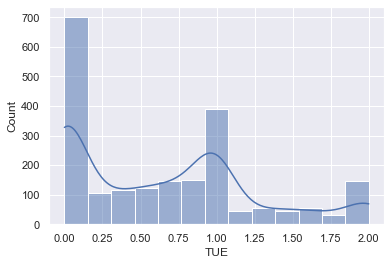

In [32]:
ax = sns.histplot(df['TUE'], kde=True)

Suprisingly, a large number of observations do not use technology? This data is from 2019. Not sure if I trust this as a good predictor. This is data based on South American Countries, so perhaps I could be missing some cultural elements?

## family_history_with_overweight

<AxesSubplot:xlabel='family_history_with_overweight', ylabel='count'>

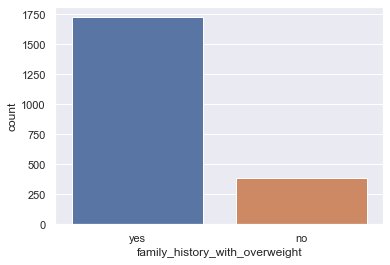

In [33]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df)

In [34]:
df.family_history_with_overweight.value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

Notably there is a disproportionate amount of observations with an overweight familty history. This may provide issues when clustering. Mainly given that most categories for the label are a subset of overweight

## FAVC

In [35]:
df.FAVC.value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

Frequent Consumption of high caloric food
Just like with family_history_with_overweight since this is a binary feature that will point to being overweight will be difficult to cluster given that most of the categories are a subset of overweight.

## CAEC

Consumption of food between meals. I.E. Where you consume the most calories..... Accidentally.

In [36]:
df.CAEC.value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

I'm not sure how useful this variables is when clustering. I will have to wait and see when running it through the algorithm.

## Smoke

In [37]:
df.SMOKE.value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

Surprisingly lower number of yes than I expected. I'd say that this is unsurprising but I think smokers are less likely to be overweight than non smokers and since out average is in obesity_I not a number to be all too surprising.

## SCC

In [38]:
df.SCC.value_counts()

no     2015
yes      96
Name: SCC, dtype: int64

Yea, didn't expect that many people to be counting calories. I think that this will be useful for clustering the non-overweigth categories.

## CALC

(array([0, 1, 2, 3]),
 [Text(0, 0, 'no'),
  Text(1, 0, 'Sometimes'),
  Text(2, 0, 'Frequently'),
  Text(3, 0, 'Always')])

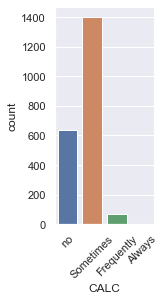

In [39]:
plt.subplot(132)
sns.countplot(x= 'CALC', data = df)
plt.xticks(rotation=45)

In [40]:
df.CALC.value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

Not surprised by these number in terms of the consumption of alcohol. This there are a decent number of categories I think that this will be useful in the clustering.

## MTRANS

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Public_Transportation'),
  Text(1, 0, 'Walking'),
  Text(2, 0, 'Automobile'),
  Text(3, 0, 'Motorbike'),
  Text(4, 0, 'Bike')])

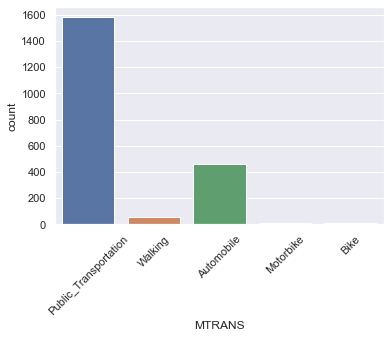

In [41]:
plt.figure(figsize=(20,4))
plt.subplot(133)
sns.countplot(x= 'MTRANS', data = df)
plt.xticks(rotation=45)

In [42]:
df.MTRANS.value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

Surprised that the number of motorbike and bike are so low. Public tranpo being the largest amount is not surprising. I typically think of everyone owning their own car as an American thing.

## Pairwise EDA

## Weight vs. Others

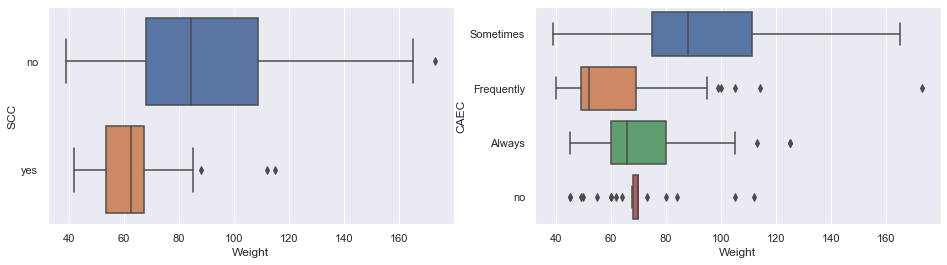

In [43]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data=df)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data=df)
plt.show()

I'd expect the calorie watchers to be on the lower end of the weight spectrum.

The consumption of food between meals is a bit unexpected though. I'd think that always and frequently would be on average higher than sometimes. So something tells me that this data isn't so much indicative of weight. I am sceptacle.

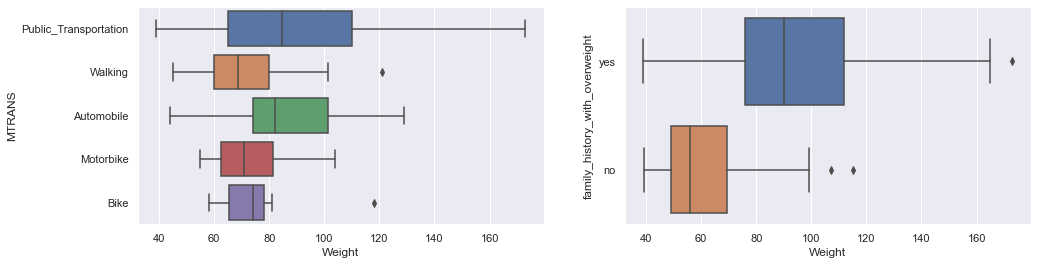

In [44]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'MTRANS', data=df)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'family_history_with_overweight', data=df)
plt.show()

The family history plot isn't all too suprising.

As for the transportation, the physically active modes on average have lower weights.

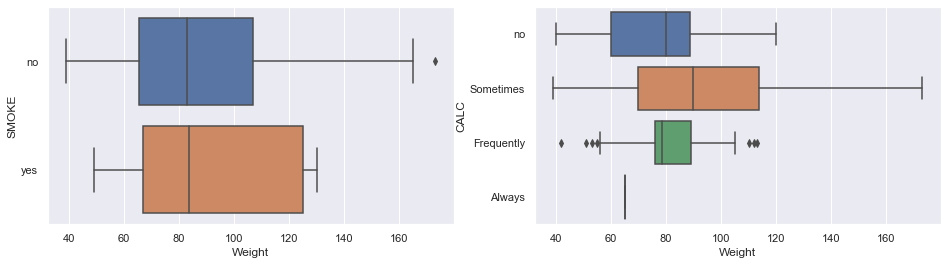

In [45]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SMOKE', data=df)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CALC', data=df)
plt.show()

Smokers have the larger range in terms of weight but the concentration of data is on the obesity_I and under range.

As for alchohol consuption. Frequently has a smaller and lower range than I thought it would be. Perhaps my own biases are affecting my judgement on this feature.

## Target Vs. Others

<AxesSubplot:xlabel='Weight', ylabel='NObeyesdad'>

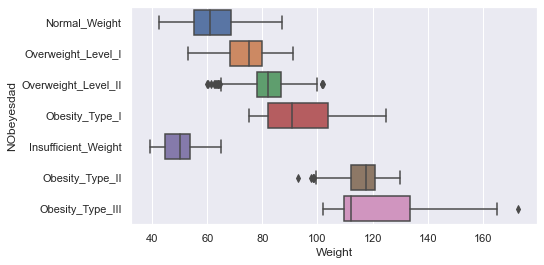

In [46]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'NObeyesdad', data=df)

This isn't too surprising as weight is the leading predictor for obesity

<AxesSubplot:xlabel='Height', ylabel='NObeyesdad'>

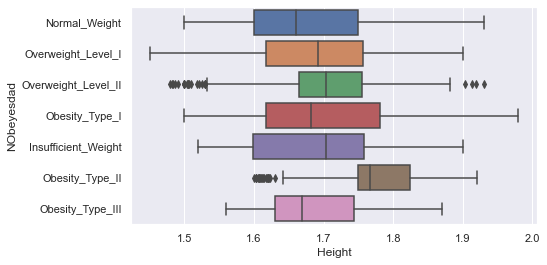

In [47]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Height', y = 'NObeyesdad', data=df)

I don't think there is anything correlating a height to a bmi type.

<AxesSubplot:xlabel='Age', ylabel='NObeyesdad'>

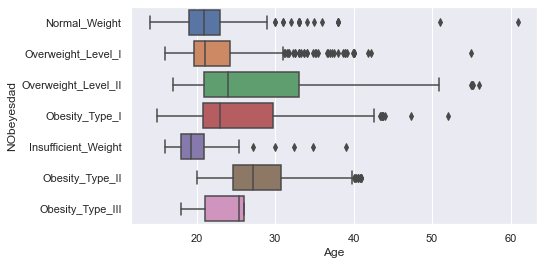

In [48]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Age', y = 'NObeyesdad', data=df)

We see that the older someone gets the more likely that individual is to be overweight.

## One hot encode categorical featrues

In [49]:
labels = df["NObeyesdad"]

In [50]:
labels.rename(index={0:"NObeyesdad"})

NObeyesdad          Normal_Weight
1                   Normal_Weight
2                   Normal_Weight
3              Overweight_Level_I
4             Overweight_Level_II
                     ...         
2106             Obesity_Type_III
2107             Obesity_Type_III
2108             Obesity_Type_III
2109             Obesity_Type_III
2110             Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [51]:
labels = labels

In [52]:
del df["NObeyesdad"]

In [53]:
res = []
for col in df.columns:
    try:
        temp = [float(x) for x in df[col]]
        #res[col] = 'float'
    except:
        res.append(col)

In [54]:
res

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [55]:
df = pd.get_dummies(df, columns = ['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS'])

## C-Means Code

In [56]:
import skfuzzy as fuzz

## Hyperparameter Tuning

In [57]:
from sklearn.preprocessing import Normalizer, MinMaxScaler, RobustScaler
X = MinMaxScaler((-1,1)).fit_transform(RobustScaler().fit_transform(Normalizer().fit_transform(df)))

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, labels)

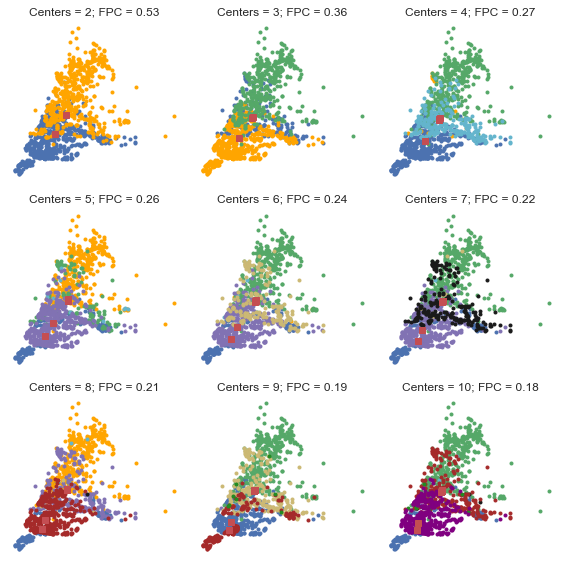

In [60]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
fpcs = []

colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen', 'Purple']
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_train.T, ncenters, 2, error=0.005, maxiter=1000, init=None, seed=[3523523])

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(X_train.T[0, u.argmax(axis=0) == j],
                X_train.T[1, u.argmax(axis=0) == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

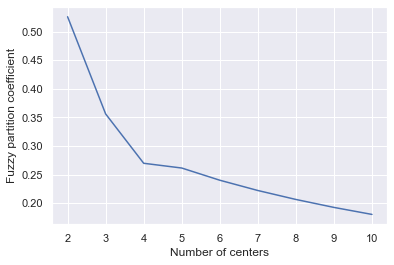

In [61]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

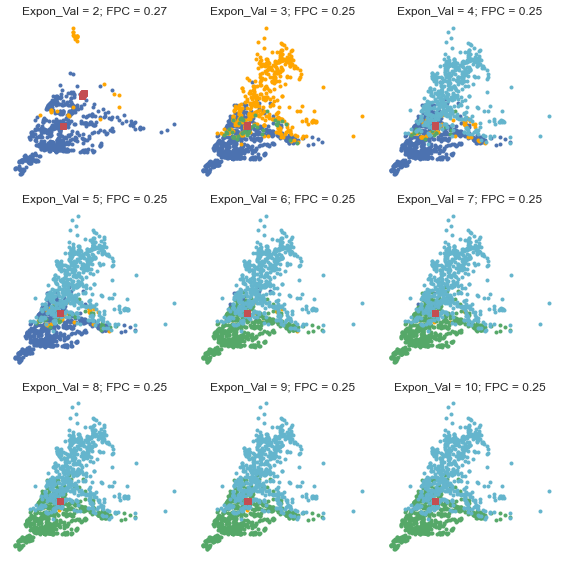

In [62]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
fpcs = []

colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen', 'Purple']
for expon, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_train.T, 4, expon, error=0.005, maxiter=1000, init=None, seed=[3523523])

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(expon):
        ax.plot(X_train.T[0, u.argmax(axis=0) == j],
                X_train.T[1, u.argmax(axis=0) == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Expon_Val = {0}; FPC = {1:.2f}'.format(expon, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

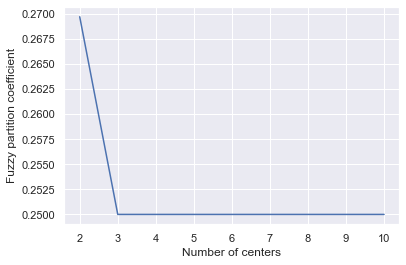

In [63]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

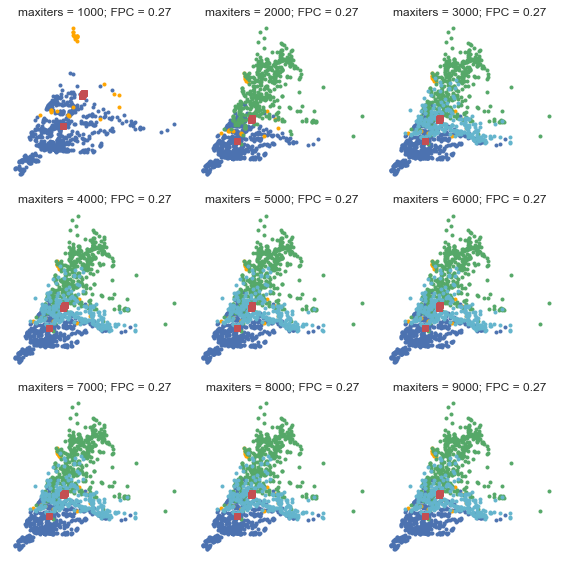

In [64]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
fpcs = []
iters = [0, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen', 'Purple']
for maxiters, ax in enumerate(axes1.reshape(-1), 2):
    iters_ = iters[maxiters]
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_train.T, 4, 2, error=0.005, maxiter=iters_, init=None, seed=[3523523])

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(maxiters):
        ax.plot(X_train.T[0, u.argmax(axis=0) == j],
                X_train.T[1, u.argmax(axis=0) == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('maxiters = {0}; FPC = {1:.2f}'.format(iters_, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

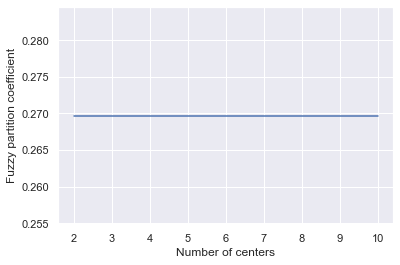

In [65]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

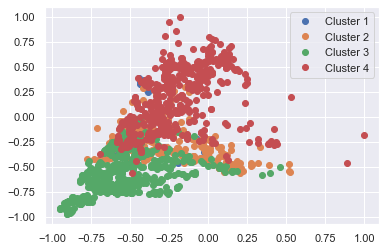

In [66]:
cntr, u, u0, d ,jm, p, fpc = fuzz.cmeans(X_train.T, 4, 2, 0.005, 1000, seed=[423423])
fig2, ax2 = plt.subplots()
ax.set_title('Trained Model')
for j in range(4):
    ax2.plot(X_train.T[0, u.argmax(axis=0) == j],
             X_train.T[1, u.argmax(axis=0) == j], 'o',
             label='Cluster ' + str(j+1))
    #x_ = X_train.T[0, u.argmax(axis=0) == j]
    #y_ = X_train.T[1, u.argmax(axis=0) == j]
    #sns.scatterplot(x=x_, y=y_)
ax2.legend()

In [68]:
X_test.shape

(528, 31)

In [69]:
cntr.shape

(4, 31)

No handles with labels found to put in legend.


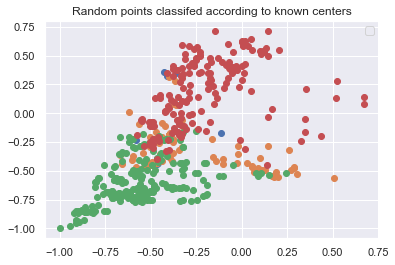

In [67]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    X_test.T, cntr, 2, error=0.005, maxiter=1000)

cluster_membership = np.argmax(u, axis=0)

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')

ax3.legend()
for j in range(4):
    ax3.plot(X_test.T[0, u.argmax(axis=0) == j],
             X_test.T[1, u.argmax(axis=0) == j], 'o',
             label='Cluster ' + str(j+1))
plt.show()